### hma data selection from global dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union


#### 1. Select the hma lakes from global dataset by location.


In [2]:
path_hma = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_reservoirs = 'data/reservoirs/GDW_reservoirs_v1_0.gpkg' 
path_reservoirs_hma = 'data/reservoirs/GDW_reservoirs_v1_0_hma.gpkg'


In [3]:
## Read data
global_reservoirs = gpd.read_file(path_reservoirs)
hma_gpd = gpd.read_file(path_hma)
print(global_reservoirs.shape)
global_reservoirs.head()


(35295, 72)


GDW_ID         RES_NAME             DAM_NAME        ALT_NAME  \
0       1    Lake Winnipeg               Jenpeg      Split Lake   
1       2          Ontario             Iroquois            None   
2       3           Baikal              Irkutsk            None   
3       4    Lake Victoria           Owen Falls            None   
4       5  Southern Indian  Missi Falls Control  Notigi Control   

           DAM_TYPE LAKE_CTRL         RIVER ALT_RIVER MAIN_BASIN  \
0  Lake Control Dam       Yes        Nelson      None       None   
1  Lake Control Dam       Yes  St. Lawrence      None       None   
2  Lake Control Dam       Yes        Angara      None       None   
3  Lake Control Dam       Yes    White Nile      None       Nile   
4  Lake Control Dam       Yes     Churchill       Rat       None   

       SUB_BASIN  ... LONG_DAM LAT_DAM ORIG_SRC POLY_SRC GRAND_ID  HYRIV_ID  \
0           None  ...      0.0     0.0    GRanD   CanVec      709  70125969   
1           None  ...      0.0     0.0    GRanD     SWBD     1485  70444883   
2           None  ...      0.0     0.0    GRanD     SWBD     5058  30588837   
3  Victoria Nile  ...      0.0     0.0    GRanD     SWBD     4492  10980811   
4           None  ...      0.0     0.0    GRanD    Other      702  70037207   

   INSTREAM  HYLAK_ID   HYBAS_L12  \
0  Instream         4  7120921060   
1  Instream         7  7121021260   
2  Instream        11  3120638840   
3  Instream        16  1122078520   
4  Instream        37  7120896070   

                                            geometry  
0  MULTIPOLYGON (((-98.80636 53.88021, -98.80578 ...  
1  MULTIPOLYGON (((-79.09167 43.81213, -79.09133 ...  
2  MULTIPOLYGON (((109.74514 55.86611, 109.74541 ...  
3  MULTIPOLYGON (((31.91181 -2.72236, 31.91141 -2...  
4  MULTIPOLYGON (((-98.19348 57.56911, -98.19312 ...  

[5 rows x 72 columns]

In [4]:
## select the lakes in the hma region
poly_hma = unary_union(hma_gpd['geometry'])
reservoirs_id = np.where(poly_hma.contains(global_reservoirs['geometry'].centroid) == True)[0]
hma_reservoirs = global_reservoirs.iloc[reservoirs_id] 
hma_reservoirs = hma_reservoirs.reset_index()
del hma_reservoirs['index']
print(hma_reservoirs.shape)


(485, 72)


In [11]:
hma_reservoirs_reproj = hma_reservoirs.to_crs('EPSG:9822')


In [5]:
### statistic of the reserviors number in each sub hma region. 
hma_gpd['num_reservoirs'] = None
for i in range(hma_gpd.shape[0]):
    region = hma_gpd['geometry'][i]
    judge = region.contains(hma_reservoirs['geometry'].centroid)
    hma_gpd['num_reservoirs'][i] = sum(judge)


In [12]:
### statistic of the reserviors area in each sub hma region.
hma_gpd['area_reservoirs'] = None
for i in range(hma_gpd.shape[0]):
    region = hma_gpd['geometry'][i]
    ids = np.where(region.contains(hma_reservoirs['geometry'].centroid))[0]
    area_region = hma_reservoirs_reproj.loc[ids].area.sum()
    hma_gpd['area_reservoirs'][i] = area_region



Text(0.5, 1.0, 'hma reservoirs')

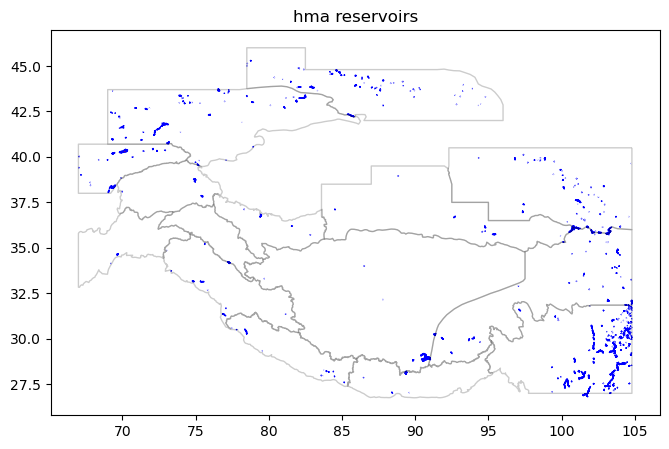

In [13]:
### Visualization
fig, ax = plt.subplots(1,1, figsize=(8,5))
hma_reservoirs.plot(color='red', ax=ax, edgecolor='blue', linewidth=1)
hma_gpd.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.2)
# hma_gpd.plot(ax=ax, column='num_reservoirs', cmap='BuGn', edgecolor='black', alpha=0.4)
# hma_gpd.plot(ax=ax, column='area_reservoirs', cmap='BuGn', edgecolor='black', alpha=0.4)
ax.set_title('hma reservoirs')


In [14]:
# # ### Write out
# hma_reservoirs.to_file(path_reservoirs_hma, driver='GPKG')
